# COMP4605.1 Data Mining Project
In this project I will be using e-commerce rates per years in some countries and determine if there is a raise in the ecommerce rate after the pandemic happened. 
My gathered data is between the years 2013-2021. I will make the analysis of the data respectively and compare the countries within each other to find out with country has the biggest rate of going up in ecommerce.
First lets import the librarys we will use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
countries = pd.read_csv('countries.csv',error_bad_lines=False,encoding = "utf-8")
categories = pd.read_csv('categoriess.csv',error_bad_lines=False,encoding = "utf-8")
uk = pd.read_csv('UK.csv',error_bad_lines=False,encoding = "utf-8")
countries

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,UK,10.40,12.20,12.60,14.90,15.70,17.00,18.30,26.20,24.30
1,USA,7.40,8.40,9.20,10.50,11.80,13.70,15.20,21.30,13.40
2,Germany,6.00,7.50,7.90,8.50,9.10,11.00,11.70,19.90,18.70
3,France,5.50,6.20,6.80,7.50,8.30,8.80,9.80,14.30,13.80
4,Japan,4.20,6.20,7.20,7.10,7.90,8.60,9.10,11.30,NaN
5,Italy,1.80,2.20,2.60,3.00,3.00,3.40,3.70,6.00,5.80
6,Spain,NaN,3.10,3.30,3.40,4.00,4.60,5.40,9.90,9.30
7,China,5.60,8.50,9.70,17.10,20.40,23.70,28.20,24.00,25.00
8,Poland,5.30,5.80,6.80,6.80,6.40,6.70,7.80,NaN,NaN
9,India,0.70,1.50,1.90,4.10,4.90,5.20,4.70,NaN,NaN


In [2]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  19 non-null     object 
 1   2013     17 non-null     float64
 2   2014     18 non-null     float64
 3   2015     19 non-null     float64
 4   2016     19 non-null     float64
 5   2017     19 non-null     float64
 6   2018     19 non-null     float64
 7   2019     18 non-null     float64
 8   2020     16 non-null     float64
 9   2021     12 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.6+ KB


There are 19 countries, and 9 years that we will observe the ecommerce rate differing in between. This is the shape of our dataset

In [3]:
countries.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,17.000000,18.000000,19.000000,19.000000,19.000000,19.000000,18.000000,16.000000,12.000000
mean,4.702353,5.585000,5.842632,6.755789,7.663684,8.545263,9.859444,13.203750,13.451667
std,2.437077,2.828166,2.890400,3.927891,4.385554,5.125286,5.998863,6.585843,6.386466
min,0.700000,1.500000,1.900000,2.770000,3.000000,3.400000,3.700000,4.660000,5.120000
25%,3.100000,3.350000,3.550000,3.900000,4.850000,5.100000,6.400000,8.267500,9.225000
50%,5.000000,5.900000,6.000000,6.400000,6.400000,7.200000,7.885000,11.800000,12.750000
75%,5.700000,7.482500,7.425000,8.000000,8.800000,10.050000,11.250000,16.930000,15.025000
max,10.400000,12.200000,12.600000,17.100000,20.400000,23.700000,28.200000,26.200000,25.000000


In [4]:
countriesdata = countries.fillna("Unknown")
#we will fill the NaN's with "Unknown" as those years' ecommerce rates are unknown. 
countriesdata

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,UK,10.4,12.2,12.60,14.90,15.70,17.00,18.3,26.2,24.3
1,USA,7.4,8.4,9.20,10.50,11.80,13.70,15.2,21.3,13.4
2,Germany,6,7.5,7.90,8.50,9.10,11.00,11.7,19.9,18.7
3,France,5.5,6.2,6.80,7.50,8.30,8.80,9.8,14.3,13.8
4,Japan,4.2,6.2,7.20,7.10,7.90,8.60,9.1,11.3,Unknown
5,Italy,1.8,2.2,2.60,3.00,3.00,3.40,3.7,6,5.8
6,Spain,Unknown,3.1,3.30,3.40,4.00,4.60,5.4,9.9,9.3
7,China,5.6,8.5,9.70,17.10,20.40,23.70,28.2,24,25
8,Poland,5.3,5.8,6.80,6.80,6.40,6.70,7.8,Unknown,Unknown
9,India,0.7,1.5,1.90,4.10,4.90,5.20,4.7,Unknown,Unknown


In [5]:
co = countriesdata['Country']
years = np.arange(2013, 2022).tolist()
print("Years:",years)

Years: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [6]:
data = np.array([co, years], dtype="object")
data = data.T
print(data[0:5])

[0              UK
1             USA
2         Germany
3          France
4           Japan
5           Italy
6           Spain
7           China
8          Poland
9           India
10         Brazil
11         Russia
12         Turkey
13    Netherlands
14        Nigeria
15        Belgium
16     Luxembourg
17          Korea
18         Cyprus
Name: Country, dtype: object
 list([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])]


array([[<AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>,
        <AxesSubplot:title={'center':'2015'}>],
       [<AxesSubplot:title={'center':'2016'}>,
        <AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>,
        <AxesSubplot:title={'center':'2021'}>]], dtype=object)

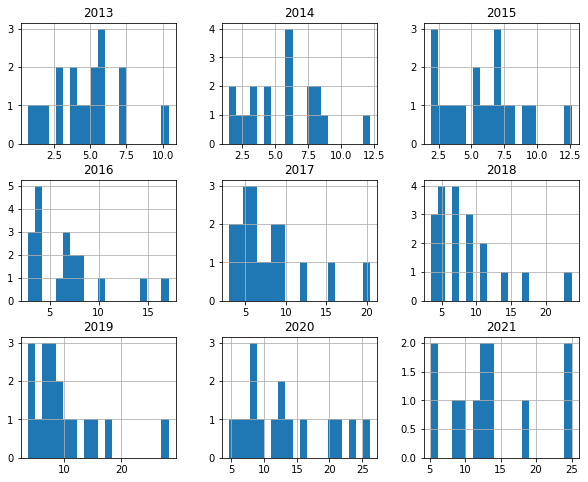

In [7]:
countries.hist(figsize=(10,8),bins=20)

We see the e-commerce rate in each country according to years in this plot

In [9]:
#lets check the correlation between years
countries = countries.T
countriescorr =countries.corr()
countriescorr

,2013,2014,2015,2016,2017,2018,2019,2020,2021
2013,1.000000,0.953829,0.949727,0.752253,0.663656,0.608085,0.591604,0.717193,0.660650
2014,0.953829,1.000000,0.971794,0.814429,0.754481,0.693988,0.740911,0.818396,0.807496
2015,0.949727,0.971794,1.000000,0.899092,0.845557,0.802291,0.788170,0.849381,0.845254
2016,0.752253,0.814429,0.899092,1.000000,0.980502,0.963723,0.943532,0.892225,0.912039
2017,0.663656,0.754481,0.845557,0.980502,1.000000,0.992799,0.984361,0.888303,0.902617
2018,0.608085,0.693988,0.802291,0.963723,0.992799,1.000000,0.992902,0.896650,0.901115
2019,0.591604,0.740911,0.788170,0.943532,0.984361,0.992902,1.000000,0.873936,0.892259
2020,0.717193,0.818396,0.849381,0.892225,0.888303,0.896650,0.873936,1.000000,0.930966
2021,0.660650,0.807496,0.845254,0.912039,0.902617,0.901115,0.892259,0.930966,1.000000


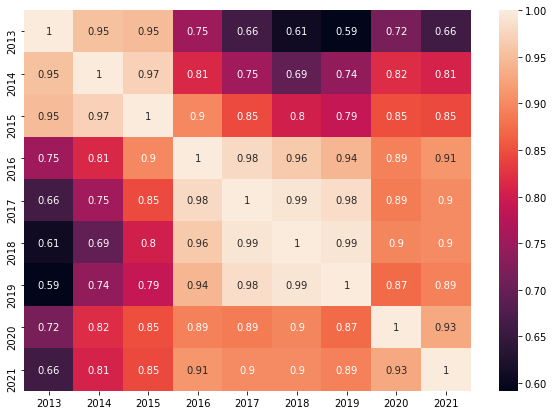

In [10]:
plt.figure(figsize = (10,7))
sns.heatmap(countriescorr, annot = True)
plt.show()

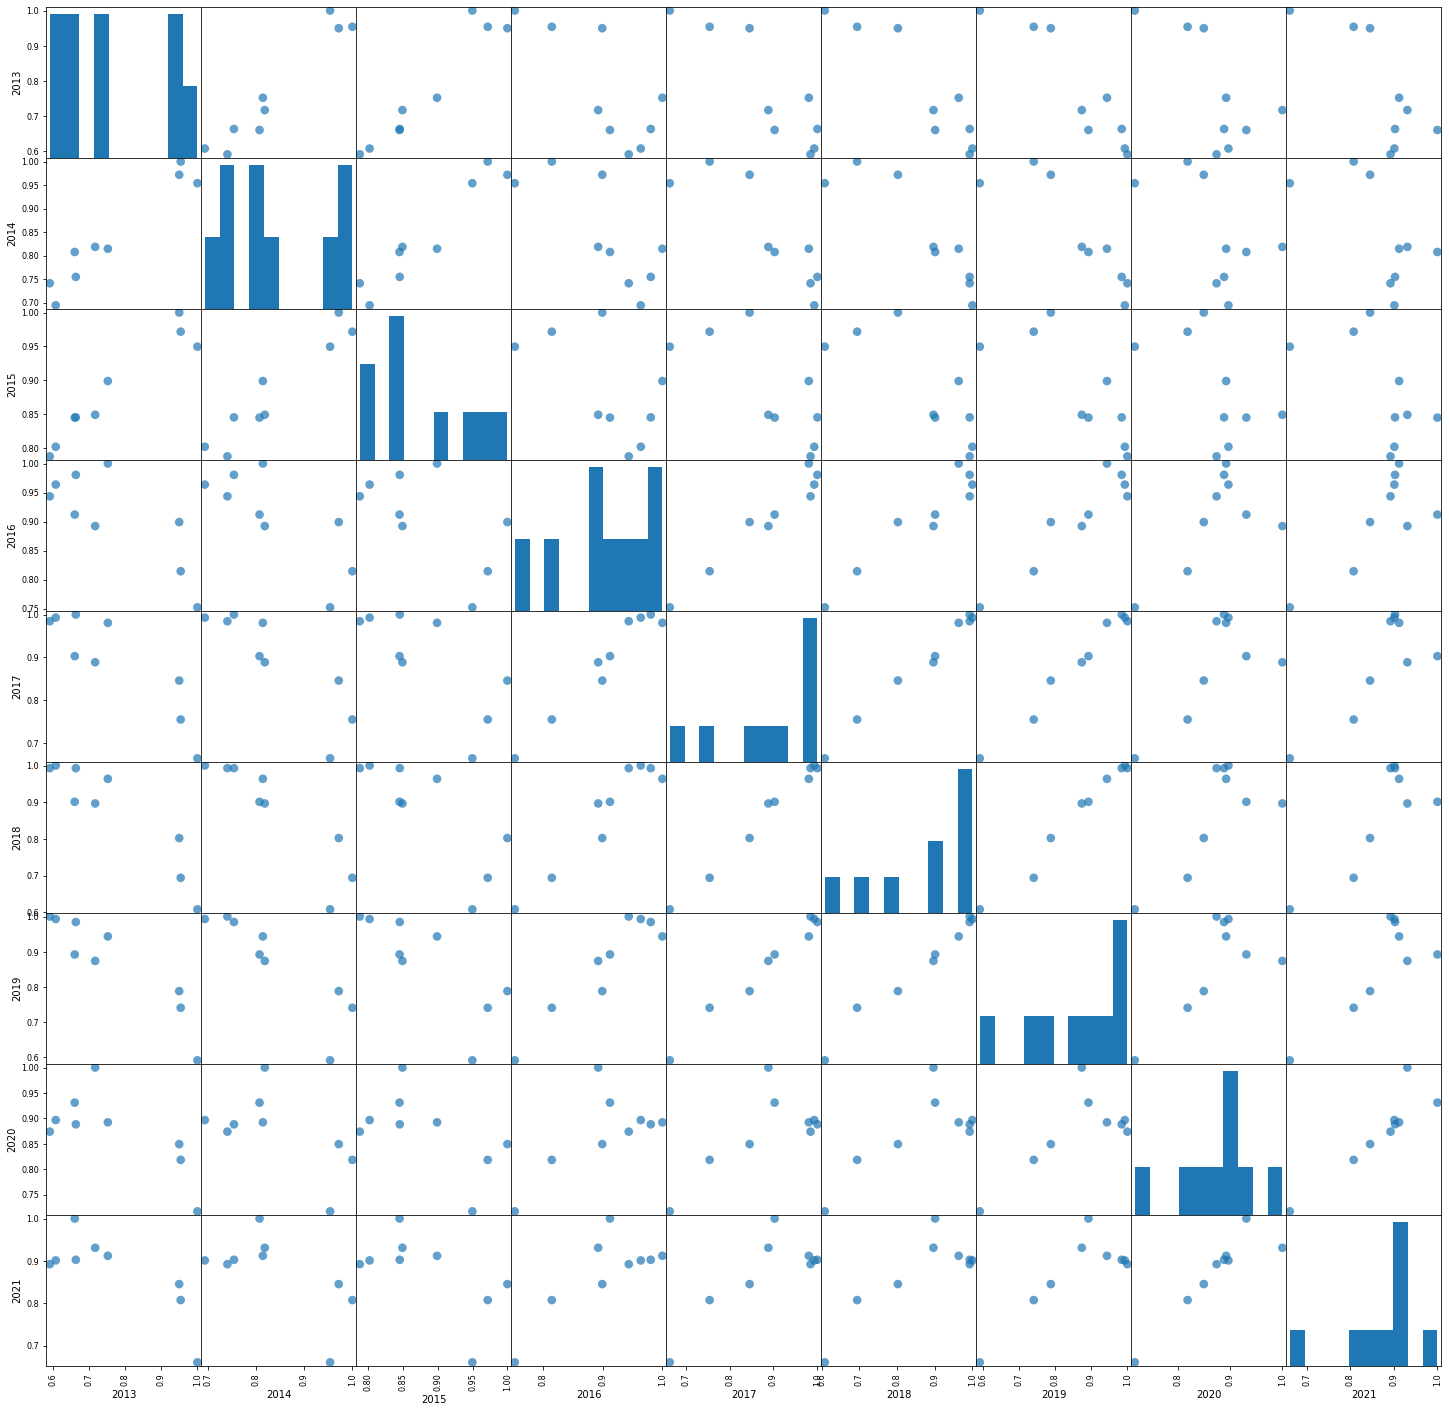

In [11]:
pd.plotting.scatter_matrix(countriescorr, figsize=(25,25), s=300, alpha=0.7)
plt.show()

So we see a nearly perfect correlation between 2018-2019. Which is when the pandemic started. So we see that the pandemic's start had effected the ecommerce rates. Now let's take a look countries one by one and examine which country has the greatest rate going up.

The range between the max percentage and the lowest in Turkey:  11.7
The mean of the ecommerce rates of Turkey is:  5.477777777777778
count     9.000000
mean      5.477778
std       4.388558
min       1.300000
25%       2.000000
50%       4.100000
75%       6.200000
max      13.000000
Name: Turkey, dtype: float64


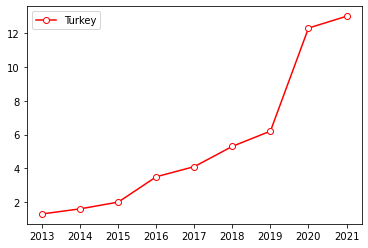

In [12]:
countries = countries.T
turkey = countries.Turkey.plot(legend=True, marker='o', markerfacecolor='white', color='red') #plot turkey column
turkey
mint = min(countries["Turkey"])
maxt = max(countries["Turkey"])
meant = (countries["Turkey"]).mean()
print("The range between the max percentage and the lowest in Turkey: ", maxt-mint )
print("The mean of the ecommerce rates of Turkey is: ", meant)
print(countries["Turkey"].describe())

The range between the max percentage and the lowest in UK:  15.799999999999999
The mean of the ecommerce rates of UK is:  16.844444444444445
count     9.000000
mean     16.844444
std       5.378920
min      10.400000
25%      12.600000
50%      15.700000
75%      18.300000
max      26.200000
Name: UK, dtype: float64


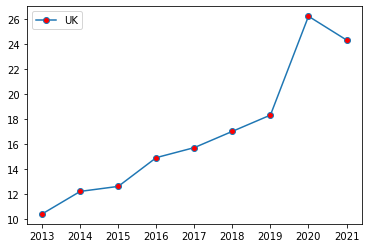

In [13]:
countries.UK.plot(legend=True, marker='o',  markerfacecolor='red' )
minuk = min(countries["UK"])
maxuk = max(countries["UK"])
meanuk = (countries["UK"]).mean()
print("The range between the max percentage and the lowest in UK: ", maxuk-minuk )
print("The mean of the ecommerce rates of UK is: ", meanuk)
print(countries["UK"].describe())

The range between the max percentage and the lowest in USA:  13.9
The mean of the ecommerce rates of USA is:  12.322222222222223
count     9.000000
mean     12.322222
std       4.255813
min       7.400000
25%       9.200000
50%      11.800000
75%      13.700000
max      21.300000
Name: USA, dtype: float64


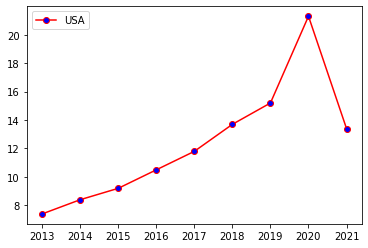

In [14]:
countries.USA.plot(legend=True, marker="o",  markerfacecolor='blue',color='red')
minus = min(countries["USA"])
maxus = max(countries["USA"])
meanus = (countries["USA"]).mean()
print("The range between the max percentage and the lowest in USA: ", maxus-minus )
print("The mean of the ecommerce rates of USA is: ",meanus)
print(countries["USA"].describe())

The range between the max percentage and the lowest in Germany:  13.899999999999999
The mean of the ecommerce rates of Germany is:  11.144444444444444
count     9.000000
mean     11.144444
std       4.943711
min       6.000000
25%       7.900000
50%       9.100000
75%      11.700000
max      19.900000
Name: Germany, dtype: float64


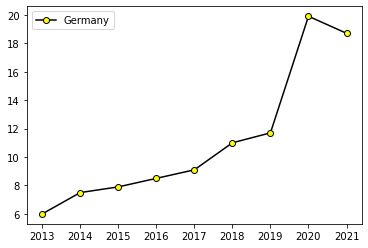

In [15]:
countries.Germany.plot(legend=True, marker="o", color="black",  markerfacecolor='yellow')
ming = min(countries["Germany"])
maxg = max(countries["Germany"])
meang = (countries["Germany"]).mean()
print("The range between the max percentage and the lowest in Germany: ", maxg-ming )
print("The mean of the ecommerce rates of Germany is: ",meang)
print(countries["Germany"].describe())

The range between the max percentage and the lowest in France:  8.8
The mean of the ecommerce rates of France is:  8.999999999999998
count     9.000000
mean      9.000000
std       3.151984
min       5.500000
25%       6.800000
50%       8.300000
75%       9.800000
max      14.300000
Name: France, dtype: float64


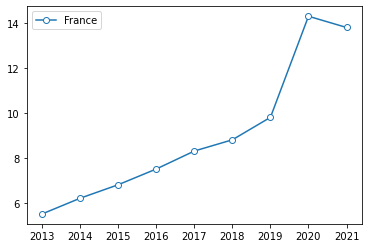

In [16]:
countries.France.plot(legend=True, marker="o",  markerfacecolor='white')
minf = min(countries["France"])
maxf = max(countries["France"])
meanf = (countries["France"]).mean()
print("The range between the max percentage and the lowest in France: ", maxf-minf )
print("The mean of the ecommerce rates of France is: ",meanf)
print(countries["France"].describe())

The range between the max percentage and the lowest in Japan:  7.1000000000000005
The mean of the ecommerce rates of Japan is:  7.700000000000001
count     8.00000
mean      7.70000
std       2.10034
min       4.20000
25%       6.87500
50%       7.55000
75%       8.72500
max      11.30000
Name: Japan, dtype: float64


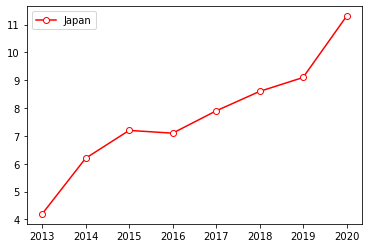

In [17]:
countries.Japan.plot(legend=True, marker="o",  markerfacecolor='white', color="red")
minj = min(countries["Japan"])
maxj = max(countries["Japan"])
meanj = (countries["Japan"]).mean()
print("The range between the max percentage and the lowest in Japan: ", maxj-minj )
print("The mean of the ecommerce rates of Japan is: ",meanj)
print(countries["Japan"].describe())

The range between the max percentage and the lowest in Italy:  4.2
The mean of the ecommerce rates of Italy is:  3.5
count    9.000000
mean     3.500000
std      1.478175
min      1.800000
25%      2.600000
50%      3.000000
75%      3.700000
max      6.000000
Name: Italy, dtype: float64


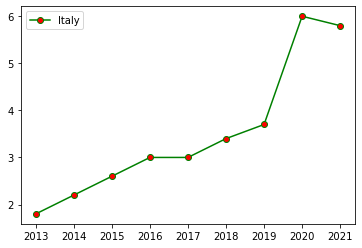

In [18]:
countries.Italy.plot(legend=True, marker="o", color="green",  markerfacecolor='red')
mini = min(countries["Italy"])
maxi = max(countries["Italy"])
meani = (countries["Italy"]).mean()
print("The range between the max percentage and the lowest in Italy: ", maxi-mini )
print("The mean of the ecommerce rates of Italy is: ",meani)
print(countries["Italy"].describe())

The range between the max percentage and the lowest in Spain:  nan
The mean of the ecommerce rates of Spain is:  5.375
count    8.000000
mean     5.375000
std      2.719112
min      3.100000
25%      3.375000
50%      4.300000
75%      6.375000
max      9.900000
Name: Spain, dtype: float64


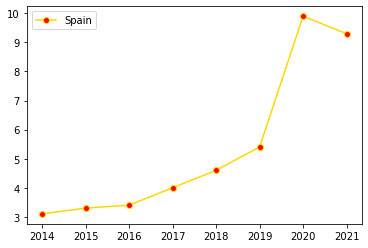

In [19]:
countries.Spain.plot(legend=True, marker="o", color="gold",  markerfacecolor='red')
mins = min(countries["Spain"])
maxs = max(countries["Spain"])
means = (countries["Spain"]).mean()
print("The range between the max percentage and the lowest in Spain: ", maxs-mins )
print("The mean of the ecommerce rates of Spain is: ",means)
print(countries["Spain"].describe())

The range between the max percentage and the lowest in China:  22.6
The mean of the ecommerce rates of China is:  18.022222222222222
count     9.000000
mean     18.022222
std       8.223408
min       5.600000
25%       9.700000
50%      20.400000
75%      24.000000
max      28.200000
Name: China, dtype: float64


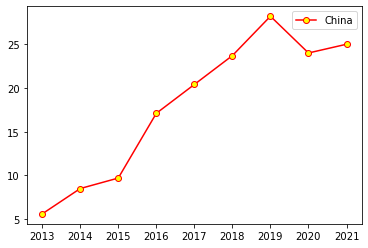

In [20]:
countries.China.plot(legend=True, marker="o", color="red",  markerfacecolor='yellow')
minc = min(countries["China"])
maxc = max(countries["China"])
meanc = (countries["China"]).mean()
print("The range between the max percentage and the lowest in China: ", maxc-minc )
print("The mean of the ecommerce rates of China is: ",meanc)
print(countries["China"].describe())

The range between the max percentage and the lowest in Poland:  2.5
The mean of the ecommerce rates of Poland is:  6.514285714285714
count    7.000000
mean     6.514286
std      0.800892
min      5.300000
25%      6.100000
50%      6.700000
75%      6.800000
max      7.800000
Name: Poland, dtype: float64


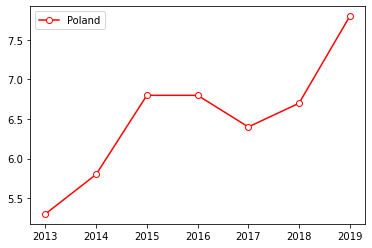

In [21]:
countries.Poland.plot(legend=True, marker="o", color="red",  markerfacecolor='white')
minp= min(countries["Poland"])
maxp= max(countries["Poland"])
meanp = (countries["Poland"]).mean()
print("The range between the max percentage and the lowest in Poland: ", maxp-minp )
print("The mean of the ecommerce rates of Poland is: ",meanp)
print(countries["Poland"].describe())

The range between the max percentage and the lowest in India:  4.5
The mean of the ecommerce rates of India is:  3.2857142857142856
count    7.000000
mean     3.285714
std      1.858699
min      0.700000
25%      1.700000
50%      4.100000
75%      4.800000
max      5.200000
Name: India, dtype: float64


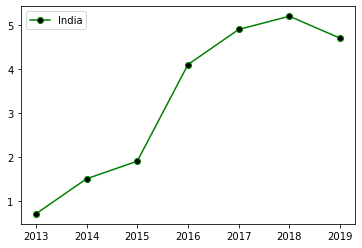

In [22]:
countries.India.plot(legend=True, marker="o", color="green",  markerfacecolor='black')
minin= min(countries["India"])
maxin= max(countries["India"])
meanin = (countries["India"]).mean()
print("The range between the max percentage and the lowest in India: ", maxin-minin )
print("The mean of the ecommerce rates of India is: ",meanin)
print(countries["India"].describe())

The range between the max percentage and the lowest in Brazil:  5.9
The mean of the ecommerce rates of Brazil is:  5.8999999999999995
count    9.000000
mean     5.900000
std      2.251666
min      3.100000
25%      4.000000
50%      6.300000
75%      7.600000
max      9.000000
Name: Brazil, dtype: float64


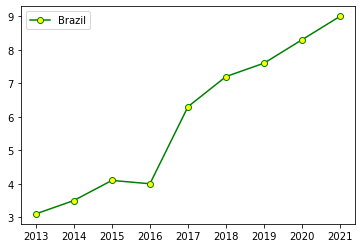

In [23]:
countries.Brazil.plot(legend=True, marker="o", color="green",  markerfacecolor='yellow')
minb= min(countries["Brazil"])
maxb= max(countries["Brazil"])
meanb = (countries["Brazil"]).mean()
print("The range between the max percentage and the lowest in Brazil: ", maxb-minb )
print("The mean of the ecommerce rates of Brazil is: ",meanb)
print(countries["Brazil"].describe())

The range between the max percentage and the lowest in Russia:  8.7
The mean of the ecommerce rates of Russia is:  5.596666666666667
count     9.000000
mean      5.596667
std       2.841320
min       2.800000
25%       3.800000
50%       4.800000
75%       7.200000
max      11.500000
Name: Russia, dtype: float64


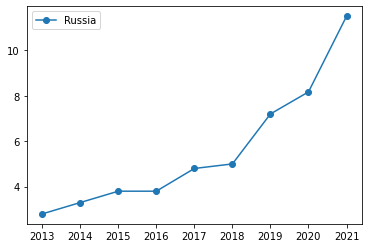

In [24]:
countries.Russia.plot(legend=True, marker="o")
minr= min(countries["Russia"])
maxr= max(countries["Russia"])
meanr = (countries["Russia"]).mean()
print("The range between the max percentage and the lowest in Russia: ", maxr-minr )
print("The mean of the ecommerce rates of Russia is: ",meanr)
print(countries["Russia"].describe())

The range between the max percentage and the lowest in Netherlands:  5.76
The mean of the ecommerce rates of Netherlands is:  9.335555555555555
count     9.000000
mean      9.335556
std       2.133355
min       7.340000
25%       7.650000
50%       8.500000
75%       9.900000
max      13.100000
Name: Netherlands, dtype: float64


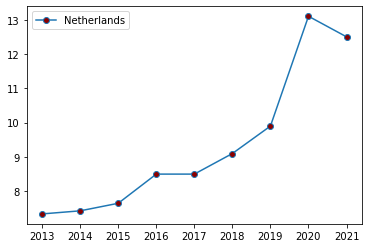

In [25]:
countries.Netherlands.plot(legend=True, marker="o",  markerfacecolor='darkred')
minne= min(countries["Netherlands"])
maxne= max(countries["Netherlands"])
meanne = (countries["Netherlands"]).mean()
print("The range between the max percentage and the lowest in Netherlands: ", maxne-minne )
print("The mean of the ecommerce rates of Netherlands is: ",meanne)
print(countries["Netherlands"].describe())

The range between the max percentage and the lowest in Nigeria:  nan
The mean of the ecommerce rates of Nigeria is:  3.7157142857142857
count    7.000000
mean     3.715714
std      1.002578
min      2.370000
25%      2.995000
50%      3.690000
75%      4.420000
max      5.120000
Name: Nigeria, dtype: float64


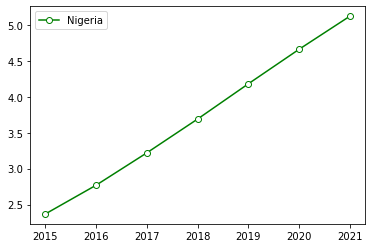

In [26]:
countries.Nigeria.plot(legend=True, marker="o", color="green",  markerfacecolor='white')
minn = min(countries["Nigeria"])
maxn = max(countries["Nigeria"])
meann = (countries["Nigeria"]).mean()
print("The range between the max percentage and the lowest in Nigeria: ", maxn-minn )
print("The mean of the ecommerce rates of Nigeria is: ",meann)
print(countries["Nigeria"].describe())

The range between the max percentage and the lowest in Belgium:  1.5
The mean of the ecommerce rates of Belgium is:  6.4750000000000005
count    8.00000
mean     6.47500
std      0.49208
min      5.70000
25%      6.30000
50%      6.40000
75%      6.77500
max      7.20000
Name: Belgium, dtype: float64


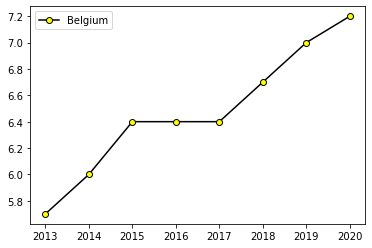

In [27]:
countries.Belgium.plot(legend=True,marker="o", color="black",  markerfacecolor='yellow')
minb = min(countries["Belgium"])
maxb = max(countries["Belgium"])
meanb = (countries["Belgium"]).mean()
print("The range between the max percentage and the lowest in Belgium: ", maxb-minb )
print("The mean of the ecommerce rates of Belgium is: ",meanb)
print(countries["Belgium"].describe())

The range between the max percentage and the lowest in Luxembourg:  4.6899999999999995
The mean of the ecommerce rates of Luxembourg is:  6.308749999999999
count    8.000000
mean     6.308750
std      1.640579
min      4.000000
25%      5.132500
50%      6.300000
75%      7.467500
max      8.690000
Name: Luxembourg, dtype: float64


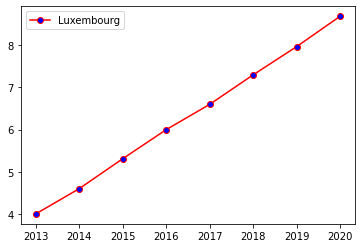

In [28]:
countries.Luxembourg.plot(legend=True, marker="o", color="red",  markerfacecolor='blue')
minl = min(countries["Luxembourg"])
maxl = max(countries["Luxembourg"])
meanl = (countries["Luxembourg"]).mean()
print("The range between the max percentage and the lowest in Luxembourg: ", maxl-minl )
print("The mean of the ecommerce rates of Luxembourg is: ",meanl)
print(countries["Luxembourg"].describe())

The range between the max percentage and the lowest in Korea:  12.14
The mean of the ecommerce rates of Korea is:  8.77375
count     8.000000
mean      8.773750
std       4.480625
min       3.800000
25%       5.160000
50%       7.840000
75%      11.907500
max      15.940000
Name: Korea, dtype: float64


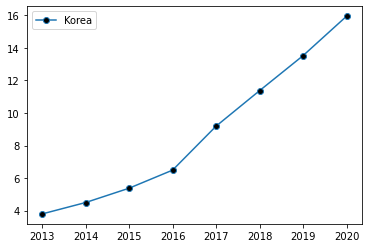

In [29]:
countries.Korea.plot(legend=True, marker="o",  markerfacecolor='black')
mink = min(countries["Korea"])
maxk = max(countries["Korea"])
meank = (countries["Korea"]).mean()
print("The range between the max percentage and the lowest in Korea: ", maxk-mink )
print("The mean of the ecommerce rates of Korea is: ",meank)
print(countries["Korea"].describe())

The range between the max percentage and the lowest in Cyprus:  4.0
The mean of the ecommerce rates of Cyprus is:  5.333333333333333
count    6.000000
mean     5.333333
std      1.505545
min      4.000000
25%      4.250000
50%      5.000000
75%      5.750000
max      8.000000
Name: Cyprus, dtype: float64


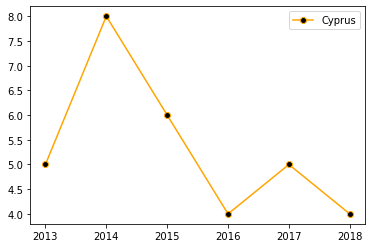

In [30]:
countries.Cyprus.plot(legend=True, marker="o", color="orange",  markerfacecolor='black')
mincy = min(countries["Cyprus"])
maxcy = max(countries["Cyprus"])
meancy = (countries["Cyprus"]).mean()
print("The range between the max percentage and the lowest in Cyprus: ", maxcy-mincy )
print("The mean of the ecommerce rates of Cyprus is: ",meancy)
print(countries["Cyprus"].describe())

From the mean and the range we see that China is in the lead. Let's take a look at the Standard Errors.

In [31]:
print("SEM for Turkey", stats.sem(countries.Turkey))
print("SEM for UK", stats.sem(countries.UK))
print("SEM for USA", stats.sem(countries.USA))
print("SEM for Germany", stats.sem(countries.Germany))
print("SEM for France", stats.sem(countries.France))
print("SEM for Japan", stats.sem(countries.Japan))
print("SEM for Italy", stats.sem(countries.Italy))
print("SEM for Spain", stats.sem(countries.Spain))
print("SEM for China", stats.sem(countries.China))
print("SEM for Poland", stats.sem(countries.Poland))
print("SEM for India", stats.sem(countries.India))
print("SEM for Brazil", stats.sem(countries.Brazil))
print("SEM for Russia", stats.sem(countries.Russia))
print("SEM for Netherlands", stats.sem(countries.Netherlands))
print("SEM for Nigeria", stats.sem(countries.Nigeria))
print("SEM for Belgium", stats.sem(countries.Belgium))
print("SEM for Luxembourg", stats.sem(countries.Luxembourg))
print("SEM for Korea", stats.sem(countries.Korea))
print("SEM for Cyprus", stats.sem(countries.Cyprus))

SEM for Turkey 1.4628527853495508
SEM for UK 1.7929732531244724
SEM for USA 1.4186043393437575
SEM for Germany 1.6479036439528514
SEM for France 1.0506611674982993
SEM for Japan nan
SEM for Italy 0.492724849969816
SEM for Spain nan
SEM for China 2.7411361076192162
SEM for Poland nan
SEM for India nan
SEM for Brazil 0.7505553499465135
SEM for Russia 0.9471067052402865
SEM for Netherlands 0.7111182725333841
SEM for Nigeria nan
SEM for Belgium nan
SEM for Luxembourg nan
SEM for Korea nan
SEM for Cyprus nan


# Hypothesis 1
“Ecommerce rates over countries. Which country has the greatest rate going up?”
Hypothesis: U.S. has the greatest rate going up in pandemic.

SO, let's take a look at USA too.

(array([1., 2., 0., 0., 0., 1., 1., 0., 3., 1.]),
 array([ 5.6 ,  7.86, 10.12, 12.38, 14.64, 16.9 , 19.16, 21.42, 23.68,
        25.94, 28.2 ]),
 <BarContainer object of 10 artists>)

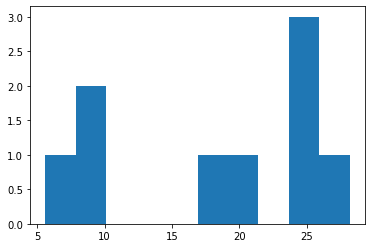

In [36]:
plt.hist(countries.China)

(array([2., 1., 1., 1., 2., 1., 0., 0., 0., 1.]),
 array([ 7.4 ,  8.79, 10.18, 11.57, 12.96, 14.35, 15.74, 17.13, 18.52,
        19.91, 21.3 ]),
 <BarContainer object of 10 artists>)

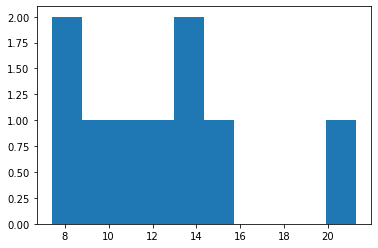

In [160]:
plt.hist(countries.USA)

China has the highest numbers through the years but we are looking for the highest going up in percentages. Let's take a look at UK.

(array([1., 2., 1., 1., 1., 1., 0., 0., 1., 1.]),
 array([10.4 , 11.98, 13.56, 15.14, 16.72, 18.3 , 19.88, 21.46, 23.04,
        24.62, 26.2 ]),
 <BarContainer object of 10 artists>)

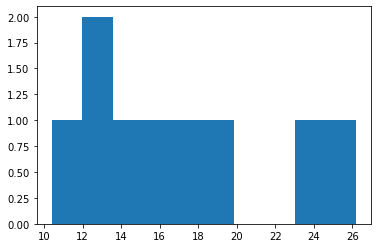

In [41]:
plt.hist(countries.UK)

<AxesSubplot:>

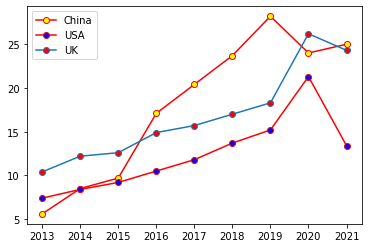

In [42]:
countries.China.plot(legend=True, marker="o", color="red",  markerfacecolor='yellow')
countries.USA.plot(legend=True, marker="o",  markerfacecolor='blue',color='red')
countries.UK.plot(legend=True, marker='o',  markerfacecolor='red' )

From the countries examined one by one we know the max ecommerce rates which are as followed:

In [137]:
print("Max for China: ", maxc)
print("Max for UK: ", maxuk)
print("Max for USA: ", maxus)
#we will compare their max rates with the year before.
print("Max value for China is in year: ",countries.China.idxmax())
print("The year before has the percentage: ", countries.China.iloc[5:6])
print("The rate of going up in China is 4.5")
print("Max value for USA is in year: ",countries.USA.idxmax())
print("The year before has the percentage: ", countries.USA.iloc[6:7])
print("The rate of going up in USA is 6.1")
print("Max value for UK is in year: ",countries.UK.idxmax())
print("The year before has the percentage: ", countries.UK.iloc[6:7])
print("The rate of going up in UK is 11")

Max for China:  28.2
Max for UK:  26.2
Max for USA:  21.3
Max value for China is in year:  2019
The year before has the percentage:  2018    23.7
Name: China, dtype: float64
The rate of going up in China is 4.5
Max value for USA is in year:  2020
The year before has the percentage:  2019    15.2
Name: USA, dtype: float64
The rate of going up in USA is 6.1
Max value for UK is in year:  2020
The year before has the percentage:  2019    18.3
Name: UK, dtype: float64
The rate of going up in UK is 11


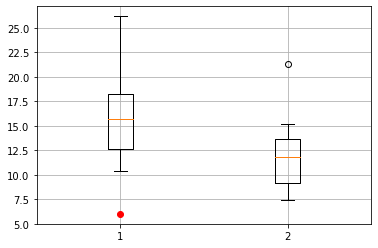

In [175]:
britain = countries.UK
usa = countries.USA
data = np.array([britain, usa])
data = data.T
plt.boxplot(data)
plt.grid()
plt.plot(1,6,'ro')

In [159]:
#Let's check this with t-test.

britain = countries.UK
usa = countries.USA
from scipy.stats import ttest_ind, ttest_ind_from_stats
degrees_of_freedom =  len(countries['UK'] + len(countries['USA']) ) - 2
print('degrees of freedom=',degrees_of_freedom)
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(stats.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom), 3)
print('t critical',t_critical)
stat, p = ttest_ind(countries['UK'], countries['USA'])
print('t=%.3f, p=%.3f' % (stat, p))

if abs(stat) <= t_critical:
     print('Accept null hypothesis.')
else:
     print('Reject the null hypothesis.')


degrees of freedom= 7
t critical -2.365
t=1.978, p=0.065
Reject the null hypothesis.


H0: USA has the greatest rate going up.

We come to the conclusion that we reject H0, as UK has a biggest rate.

# Hypothesis 2

 “Did covid effect ecommerce in a good, or bad way?” is the main question in my project. 
 Hypothesis: It effected ecommerce in a good way

From the plots we have examined, we are confident to say that pandemic has effected ecommerce in a good way

# Hypothesis 3

“What will be the e-commerce grow rate in 2020 in Turkey according to the given data? 
Will the e-commerce rate go up or down?”

Hypothesis: The rate will go up 

So, let's take a look at Turkey, again.

<AxesSubplot:>

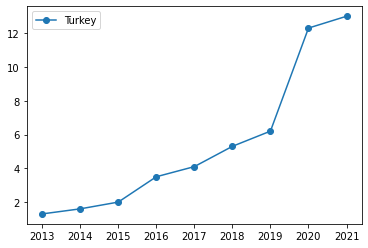

In [44]:
countries.Turkey.plot(legend=True, marker="o")

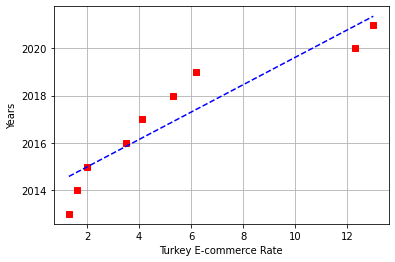

In [45]:
from sklearn.linear_model import LinearRegression
years = np.arange(2013, 2022).tolist()
lr = LinearRegression()
turkey = countries["Turkey"].values.reshape(-1,1)
lr.fit(turkey, years)
pred = lr.predict(turkey)
plt.plot(turkey, years, 'rs')
plt.plot(turkey, pred, 'b--')
plt.xlabel('Turkey E-commerce Rate')
plt.ylabel('Years')
plt.grid()

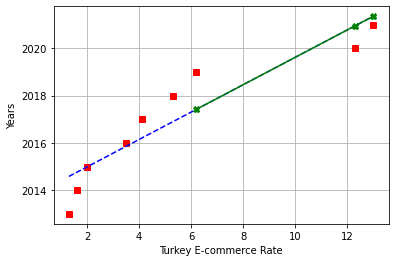

In [46]:
#Now we will use the last 3 years 2019-2020-2021 to predict the next 3 years
recent3 = turkey[-3:].reshape(-1,1)
prednext3 = lr.predict(recent3)
plt.plot(turkey, years, 'rs')
plt.plot(turkey, pred, 'b--')
plt.xlabel('Turkey E-commerce Rate')
plt.ylabel('Years')
plt.plot(recent3, prednext3, 'g-X')
plt.grid()

So, we won't reject H0 here as the rates went up. Let's take a look at our next data. 
# The categories

In [47]:
categories

,Categories,Germany,United Kingdom,United States,Turkey,Poland,Sweden,Norway,Russia,Japan,China,South Korea
0,Takeaway,16,19,31,29.0,NaN,12.0,12.0,5.0,25.0,17.0,7.2
1,Hygiene products,13,21,27,NaN,40.0,33.0,NaN,13.0,NaN,30.0,9.9
2,Clothing,25,21,27,40.0,27.0,42.0,NaN,2.4,27.0,20.0,11.0
3,Household cleaning products,9,17,26,33.0,53.0,13.0,31.0,NaN,24.0,50.0,7.4
4,Supermarket,10,30,24,50.0,52.0,19.0,14.0,18.0,25.0,35.0,9.9
5,Health products,15,15,21,34.0,43.0,43.0,NaN,13.0,9.0,30.0,9.9
6,Books,14,16,15,NaN,55.0,23.0,31.0,2.2,20.0,NaN,NaN
7,Hobby supplies,9,14,15,33.0,50.0,4.0,50.0,NaN,NaN,40.0,NaN
8,Games,10,13,13,NaN,13.0,5.0,NaN,NaN,NaN,8.0,NaN
9,Electronics,9,11,11,18.0,66.0,22.0,31.0,3.0,26.0,57.0,10.7


In [48]:
categories.describe()

,Germany,United Kingdom,United States,Turkey,Poland,Sweden,Norway,Russia,Japan,China,South Korea
count,15.000000,15.000000,15.000000,8.000000,12.000000,12.000000,10.000000,9.00000,11.000000,11.000000,8.000000
mean,13.400000,15.800000,17.933333,34.750000,47.333333,21.333333,36.200000,8.20000,20.090909,30.272727,9.825000
std,10.622079,8.661903,9.003703,9.407444,14.729891,12.680216,15.718354,6.43506,7.049178,17.041660,1.798213
min,4.000000,3.000000,3.000000,18.000000,13.000000,4.000000,12.000000,2.20000,5.000000,3.000000,7.200000
25%,8.000000,9.500000,11.000000,32.000000,42.250000,12.750000,31.000000,2.40000,20.000000,18.500000,9.275000
50%,10.000000,15.000000,15.000000,33.500000,52.500000,20.000000,34.500000,5.00000,20.000000,30.000000,9.900000
75%,14.500000,20.000000,26.500000,40.250000,55.000000,25.500000,48.000000,13.00000,25.000000,41.500000,10.775000
max,47.000000,35.000000,31.000000,50.000000,66.000000,43.000000,59.000000,18.00000,27.000000,57.000000,12.600000


In [49]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Categories      15 non-null     object 
 1   Germany         15 non-null     int64  
 2   United Kingdom  15 non-null     int64  
 3   United States   15 non-null     int64  
 4   Turkey          8 non-null      float64
 5   Poland          12 non-null     float64
 6   Sweden          12 non-null     float64
 7   Norway          10 non-null     float64
 8   Russia          9 non-null      float64
 9   Japan           11 non-null     float64
 10  China           11 non-null     float64
 11  South Korea     8 non-null      float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.5+ KB


In [50]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

categories = categories.fillna("0")
categories = categories.drop(columns=['Categories'])

In [51]:
km = KMeans(n_clusters=15, init='k-means++',random_state=0)
km.fit(categories)
predict = km.predict(categories)
#print(km.cluster_centers_)

In [52]:
centers = km.cluster_centers_
print(centers)

[[ 6.   7.   6.   0.   0.   0.  38.   0.  20.  43.  12.6]
 [10.  30.  24.  50.  52.  19.  14.  18.  25.  35.   9.9]
 [14.  16.  15.   0.  55.  23.  31.   2.2 20.   0.   0. ]
 [10.  13.  13.   0.  13.   5.   0.   0.   0.   8.   0. ]
 [ 9.  14.  15.  33.  50.   4.  50.   0.   0.  40.   0. ]
 [ 9.  17.  26.  33.  53.  13.  31.   0.  24.  50.   7.4]
 [13.  21.  27.   0.  40.  33.   0.  13.   0.  30.   9.9]
 [16.  19.  31.  29.   0.  12.  12.   5.  25.  17.   7.2]
 [25.  21.  27.  40.  27.  42.   0.   2.4 27.  20.  11. ]
 [ 4.   3.   3.  41.  59.   0.  59.  15.   5.   0.   0. ]
 [47.  35.  29.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 9.  11.  11.  18.  66.  22.  31.   3.  26.  57.  10.7]
 [15.  15.  21.  34.  43.  43.   0.  13.   9.  30.   9.9]
 [ 7.   8.  10.   0.  55.  20.  54.   0.  20.   3.   0. ]
 [ 7.   7.  11.   0.  55.  20.  42.   2.2 20.   0.   0. ]]


In [53]:
print(predict)

[ 7  6  8  5  1 12  2  4  3 11 14 13  0  9 10]


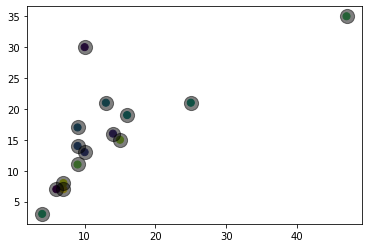

In [54]:
cat = categories.values
plt.scatter(cat[:, 0], cat[:, 1], c=predict, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Now let's take a look at the next dataset where we will comment on the raise or drop in the categories. The next dataset is from UK. 
# Hypothesis 4 
 “Did ecommerce rates go up in each 
category?”
Hypothesis: Ecommerce rates went up in each category


In [55]:
uk

,Date,Non-store retailing,Textiles clothing and footwear stores,All retailing,Household goods stores,Predominantly food stores,Other stores,Data Type
0,10-Jan,53.3,5.9,6.6,6.5,2.5,4.8,in %
1,10-Feb,52.8,5.1,6.7,6.5,2.9,5.3,in %
2,10-Mar,53.0,5.5,6.7,4.7,2.7,5.5,in %
3,10-Apr,51.6,5.8,6.9,4.9,2.9,6.3,in %
4,10-May,54.5,5.8,7.0,5.0,2.7,6.6,in %
...,...,...,...,...,...,...,...,...
130,20-Nov,82.6,41.8,32.0,28.6,10.5,27.8,in %
131,20-Dec,79.3,32.4,29.8,21.4,11.2,22.9,in %
132,21-Jan,83.0,50.8,35.3,32.6,12.1,39.1,in %
133,21-Feb,85.0,59.5,36.2,38.5,11.9,40.1,in %


In [56]:
uk.describe()

,Non-store retailing,Textiles clothing and footwear stores,All retailing,Household goods stores,Predominantly food stores,Other stores
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,72.515556,15.011852,14.617778,10.751111,4.730370,10.537037
std,8.573404,9.799361,6.712351,8.377634,2.206343,7.117686
min,51.600000,5.100000,6.600000,4.300000,2.500000,4.800000
25%,67.200000,9.500000,9.650000,5.800000,3.200000,7.500000
50%,73.600000,12.900000,12.600000,7.000000,4.200000,8.100000
75%,79.500000,17.300000,18.050000,12.550000,5.400000,10.300000
max,85.900000,59.500000,36.200000,60.900000,12.100000,47.700000


In [57]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   135 non-null    object 
 1   Non-store retailing                    135 non-null    float64
 2   Textiles clothing and footwear stores  135 non-null    float64
 3   All retailing                          135 non-null    float64
 4   Household goods stores                 135 non-null    float64
 5   Predominantly food stores              135 non-null    float64
 6   Other stores                           135 non-null    float64
 7   Data Type                              135 non-null    object 
dtypes: float64(6), object(2)
memory usage: 8.6+ KB


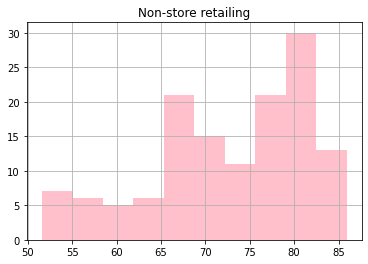

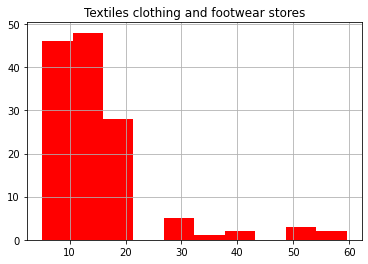

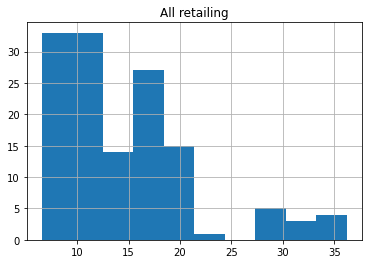

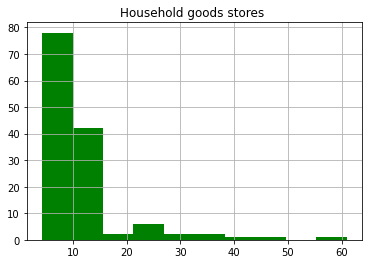

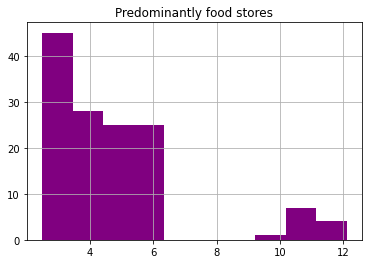

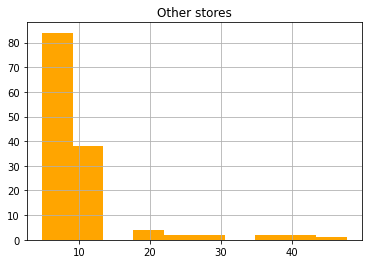

In [58]:
uk["Non-store retailing"].hist( color = "pink")
plt.title('Non-store retailing')
plt.show()
uk["Textiles clothing and footwear stores"].hist(color = "red")
plt.title("Textiles clothing and footwear stores")
plt.show()
uk["All retailing"].hist()
plt.title("All retailing")
plt.show()
uk["Household goods stores"].hist(color = "green")
plt.title("Household goods stores ")
plt.show()
uk["Predominantly food stores"].hist(color = "purple")
plt.title("Predominantly food stores")
plt.show()
uk["Other stores"].hist(color = "orange")
plt.title("Other stores")
plt.show()

Let's take a look at the means

In [59]:
m1 = uk["Non-store retailing"].mean()
print("Mean for Non-store retailing is: ", m1)
m2 = uk["Textiles clothing and footwear stores"].mean()
print("Mean for Textiles clothing and footwear stores is: ",m2)
m3 = uk["All retailing"].mean()
print("Mean for All retailing is: ", m3)
m4 = uk["Household goods stores"].mean()
print("Mean for Household goods stores is: ", m4)
m5 = uk["Predominantly food stores"].mean()
print("Mean for Predominantly food stores is: ",m5)
m6 = uk["Other stores"].mean()
print("Mean for Other stores is: ",m6)

Mean for Non-store retailing is:  72.51555555555555
Mean for Textiles clothing and footwear stores is:  15.01185185185185
Mean for All retailing is:  14.617777777777778
Mean for Household goods stores is:  10.751111111111111
Mean for Predominantly food stores is:  4.7303703703703714
Mean for Other stores is:  10.537037037037035


In [60]:
ukdate = uk["Date"]
uk = uk.drop(columns=['Date'])
uk = uk.drop(columns=['Data Type'])


In [61]:
km = KMeans(n_clusters=6, init='k-means++',random_state=0)
km.fit(uk)
predict = km.predict(uk)
centers = km.cluster_centers_
print(centers)

[[56.35        6.51111111  7.52777778  5.48333333  2.72222222  7.38333333]
 [79.73478261 16.51956522 17.45869565 12.53913043  5.33043478 10.15217391]
 [81.3        53.12       34.34       42.94       11.24       41.        ]
 [73.895      12.5        12.635       7.385       4.17        7.455     ]
 [67.5         9.78421053  9.93947368  5.63421053  3.27105263  7.58684211]
 [82.2625     32.7625     29.0875     24.925      10.0625     22.525     ]]


In [62]:
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 5 2 2 5 5 5 5 5 5 5 2 2 2]


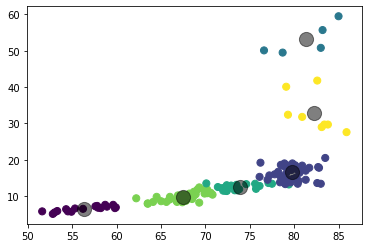

In [63]:
val = uk.values
plt.scatter(val[:, 0], val[:, 1], c=predict, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

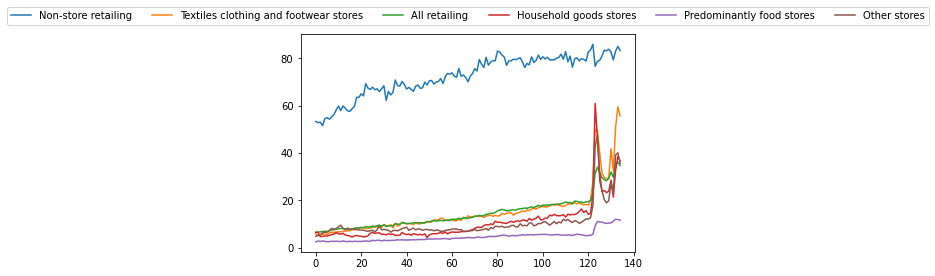

In [64]:
uk.plot(legend=False)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.show()

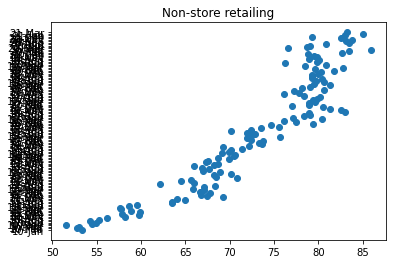

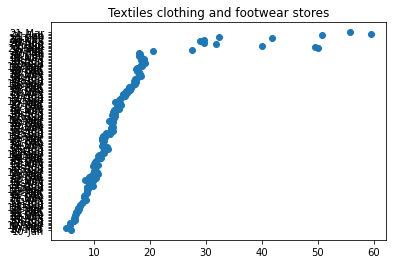

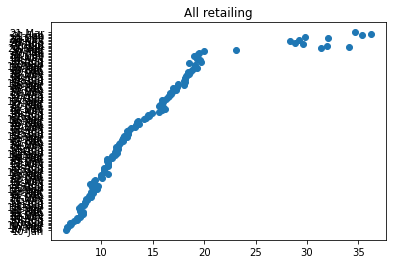

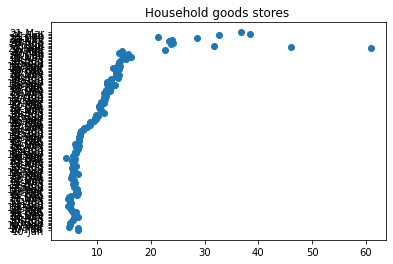

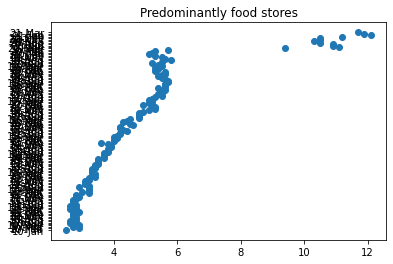

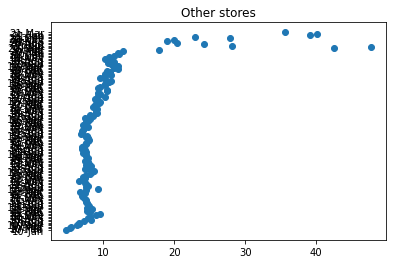

In [65]:
plt.scatter(uk["Non-store retailing"],ukdate)
plt.title("Non-store retailing")
plt.show()
plt.scatter(uk["Textiles clothing and footwear stores"], ukdate)
plt.title("Textiles clothing and footwear stores")
plt.show()
plt.scatter(uk["All retailing"], ukdate)
plt.title("All retailing")
plt.show()
plt.scatter(uk["Household goods stores"], ukdate)
plt.title("Household goods stores ")
plt.show()
plt.scatter(uk["Predominantly food stores"], ukdate)
plt.title("Predominantly food stores")
plt.show()
plt.scatter(uk["Other stores"], ukdate)
plt.title("Other stores")
plt.show()

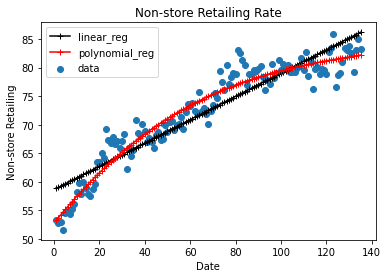

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
ukdate = np.arange(1, 136).tolist() #136 as there are 136 rows.
ukdate = np.array(ukdate).reshape(-1,1)
X_non =  np.array(uk["Non-store retailing"]).reshape(-1,1)
lin_reg_non = LinearRegression()
lin_reg_non.fit(ukdate,X_non)
#Polynomial Regression Model Fitting
poly_reg_non = PolynomialFeatures(degree=3)
X_poly_non = poly_reg_non.fit_transform(ukdate)
pol_reg_non = LinearRegression()
pol_reg_non.fit(X_poly_non, X_non)
linear_pred_non = lin_reg_non.predict(ukdate)
poly_pred_non = pol_reg_non.predict(poly_reg_non.fit_transform(ukdate))

plt.scatter(ukdate, X_non)
plt.plot(ukdate, linear_pred_non, '+-', color='black')
plt.plot(ukdate, poly_pred_non, '+-', color='red')
plt.title('Non-store Retailing Rate')
plt.xlabel('Date')
plt.ylabel('Non-store Retailing')
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [103]:
print('Score:', mean_squared_error(X_non, linear_pred_non))
print('Score:', mean_squared_error(X_non, poly_pred_non))
print('Linear Model Fit Score:', lin_reg_non.score(ukdate, X_non))
print('Polynomial Model Fit Score:', pol_reg_non.score(X_poly_non, X_non))

Score: 9.763342502809122
Score: 4.8547471264260835
Linear Model Fit Score: 0.866180047319194
Polynomial Model Fit Score: 0.9334590555899585


 We can say that polynomial regression is more dependable than linear regression

In [104]:
print('Linear Regression Non-Store Retailing Predictions')
print('20 Nov: ', lin_reg_non.predict([[131]]))
print('20 Dec: ', lin_reg_non.predict([[132]]))
print('21 Jan: ', lin_reg_non.predict([[133]]))
print('21 Feb: ', lin_reg_non.predict([[134]]))
print('21 Mar: ', lin_reg_non.predict([[135]]))

Linear Regression Non-Store Retailing Predictions
20 Nov:  [[85.36700858]]
20 Dec:  [[85.5709999]]
21 Jan:  [[85.77499122]]
21 Feb:  [[85.97898254]]
21 Mar:  [[86.18297386]]


In [105]:
print('Polynomial Regression  Non-Store Retailing Predictions')
print('20 Nov: ', pol_reg_non.predict(poly_reg_non.fit_transform([[131]])))
print('20 Dec: ', pol_reg_non.predict(poly_reg_non.fit_transform([[132]])))
print('21 Jan: ', pol_reg_non.predict(poly_reg_non.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_non.predict(poly_reg_non.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_non.predict(poly_reg_non.fit_transform([[135]])))

Polynomial Regression  Non-Store Retailing Predictions
20 Nov:  [[81.93849274]]
20 Dec:  [[82.00091917]]
21 Jan:  [[82.06272012]]
21 Feb:   [[82.12393628]]
21 Mar:   [[82.18460833]]


### Real Results
20-Oct	83.8

20-Nov	82.6

20-Dec	79.3

21-Jan	83

21-Feb	85

21-Mar	83.2

The predicted values aren't so close to the real values, but they also can't be considered far either. Our error rate for the prediction was close to zero but that number for the test predictions. The predictions can be trusted to a certain value

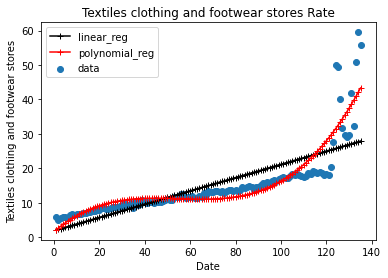

In [111]:
X_text =  np.array(uk["Textiles clothing and footwear stores"]).reshape(-1,1)
lin_reg_text = LinearRegression()
lin_reg_text.fit(ukdate,X_text)
#Polynomial Regression Model Fitting
poly_reg_text = PolynomialFeatures(degree=3)
X_poly_text = poly_reg_text.fit_transform(ukdate)
pol_reg_text = LinearRegression()
pol_reg_text.fit(X_poly_text, X_text)
linear_pred_text = lin_reg_text.predict(ukdate)
poly_pred_text = pol_reg_text.predict(poly_reg_text.fit_transform(ukdate))

plt.scatter(ukdate, X_text)
plt.plot(ukdate, linear_pred_text, '+-', color='black')
plt.plot(ukdate, poly_pred_text, '+-', color='red')
plt.title("Textiles clothing and footwear stores Rate")
plt.xlabel('Date')
plt.ylabel("Textiles clothing and footwear stores")
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [112]:
print('Score:', mean_squared_error(ukdate, linear_pred_text))
print('Score:', mean_squared_error(ukdate, poly_pred_text))
print('Linear Model Fit Score:', lin_reg_text.score(X_text, ukdate))
print('Polynomial Model Fit Score:', pol_reg_text.score(X_poly_text, ukdate))

Score: 3797.6775602263438
Score: 3819.335755880415
Linear Model Fit Score: -2.5578232568803707
Polynomial Model Fit Score: -1.514926968314584


In [113]:
print('Linear Regression Textiles clothing and footwear stores Predictions')
print('20 Nov: ', lin_reg_text.predict([[131]]))
print('20 Dec: ', lin_reg_text.predict([[132]]))
print('21 Jan: ', lin_reg_text.predict([[133]]))
print('21 Feb: ', lin_reg_text.predict([[134]]))
print('21 Mar: ', lin_reg_text.predict([[135]]))

Linear Regression Textiles clothing and footwear stores Predictions
20 Nov:  [[27.14763324]]
20 Dec:  [[27.34026469]]
21 Jan:  [[27.53289614]]
21 Feb:  [[27.72552759]]
21 Mar:  [[27.91815904]]


In [122]:
print('Polynomial Regression Textiles clothing and footwear stores Predictions')
print('20 Nov: ', pol_reg_text.predict(poly_reg_text.fit_transform([[131]])))
print('20 Dec: ', pol_reg_text.predict(poly_reg_text.fit_transform([[132]])))
print('21 Jan: ', pol_reg_text.predict(poly_reg_text.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_text.predict(poly_reg_text.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_text.predict(poly_reg_text.fit_transform([[135]])))

Polynomial Regression Textiles clothing and footwear stores Predictions
20 Nov:  [[38.59556533]]
20 Dec:  [[39.72961629]]
21 Jan:  [[40.89394298]]
21 Feb:   [[42.08893729]]
21 Mar:   [[43.31499112]]


### Real Results
20-Oct	29.7

20-Nov	41.8

20-Dec	32.4

21-Jan	50.8

21-Feb	59.5

21-Mar	55.7


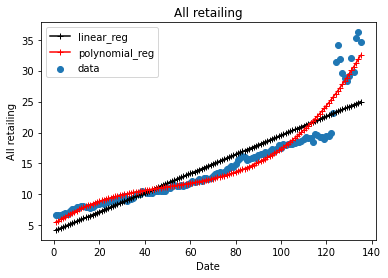

In [115]:
X_all =  np.array(uk["All retailing"]).reshape(-1,1)
lin_reg_all = LinearRegression()
lin_reg_all.fit(ukdate,X_all)
#Polynomial Regression Model Fitting
poly_reg_all = PolynomialFeatures(degree=3)
X_poly_all = poly_reg_all.fit_transform(ukdate)
pol_reg_all = LinearRegression()
pol_reg_all.fit(X_poly_all, X_all)
linear_pred_all = lin_reg_all.predict(ukdate)
poly_pred_all = pol_reg_all.predict(poly_reg_all.fit_transform(ukdate))

plt.scatter(ukdate, X_all)
plt.plot(ukdate, linear_pred_all, '+-', color='black')
plt.plot(ukdate, poly_pred_all, '+-', color='red')
plt.title("All retailing")
plt.xlabel('Date')
plt.ylabel("All retailing")
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [118]:
print('Score:', mean_squared_error(X_all, linear_pred_all))
print('Score:', mean_squared_error(X_all, poly_pred_all))
print('Linear Model Fit Score:', lin_reg_all.score(ukdate, X_all))
print('Polynomial Model Fit Score:', pol_reg_all.score(X_poly_all, X_all))

Score: 8.445061217875764
Score: 2.9354677212696982
Linear Model Fit Score: 0.8111649985303038
Polynomial Model Fit Score: 0.9343617485818959


In [119]:
print('Linear Regression All Retailing Predictions')
print('20 Nov: ', lin_reg_all.predict([[131]]))
print('20 Dec: ', lin_reg_all.predict([[132]]))
print('21 Jan: ', lin_reg_all.predict([[133]]))
print('21 Feb: ', lin_reg_all.predict([[134]]))
print('21 Mar: ', lin_reg_all.predict([[135]]))

Linear Regression All Retailing Predictions
20 Nov:  [[24.35475319]]
20 Dec:  [[24.50930836]]
21 Jan:  [[24.66386353]]
21 Feb:  [[24.81841869]]
21 Mar:  [[24.97297386]]


In [121]:
print('Polynomial Regression  All Retailing Predictions')
print('20 Nov: ', pol_reg_all.predict(poly_reg_all.fit_transform([[131]])))
print('20 Dec: ', pol_reg_all.predict(poly_reg_all.fit_transform([[132]])))
print('21 Jan: ', pol_reg_all.predict(poly_reg_all.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_all.predict(poly_reg_all.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_all.predict(poly_reg_all.fit_transform([[135]])))

Polynomial Regression  All Retailing Predictions
20 Nov:  [[30.02367349]]
20 Dec:  [[30.61353485]]
21 Jan:  [[31.2165317]]
21 Feb:   [[31.83282334]]
21 Mar:   [[32.46256907]]


### Real Results
20-Oct	29.2

20-Nov	32

20-Dec	29.8

21-Jan	35.3

21-Feb	36.2

21-Mar	34.7

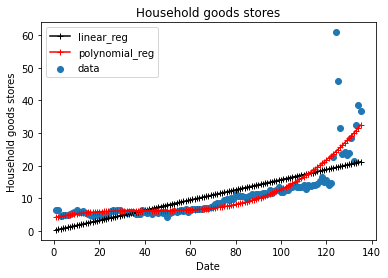

In [123]:
X_house =  np.array(uk["Household goods stores"]).reshape(-1,1)
lin_reg_house = LinearRegression()
lin_reg_house.fit(ukdate,X_house)
#Polynomial Regression Model Fitting
poly_reg_house = PolynomialFeatures(degree=3)
X_poly_house = poly_reg_house.fit_transform(ukdate)
pol_reg_house = LinearRegression()
pol_reg_house.fit(X_poly_house, X_house)
linear_pred_house= lin_reg_house.predict(ukdate)
poly_pred_house = pol_reg_house.predict(poly_reg_house.fit_transform(ukdate))

plt.scatter(ukdate, X_house)
plt.plot(ukdate, linear_pred_house, '+-', color='black')
plt.plot(ukdate, poly_pred_house, '+-', color='red')
plt.title("Household goods stores")
plt.xlabel('Date')
plt.ylabel("Household goods stores")
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [124]:
print('Score:', mean_squared_error(X_house, linear_pred_all))
print('Score:', mean_squared_error(X_house, poly_pred_all))
print('Linear Model Fit Score:', lin_reg_all.score(ukdate, X_house))
print('Polynomial Model Fit Score:', pol_reg_all.score(X_poly_house, X_house))

Score: 47.8081524349928
Score: 35.922845072651036
Linear Model Fit Score: 0.313740870713514
Polynomial Model Fit Score: 0.4843477707160522


In [125]:
print('Linear Regression Household goods stores Predictions')
print('20 Nov: ', lin_reg_house.predict([[131]]))
print('20 Dec: ', lin_reg_house.predict([[132]]))
print('21 Jan: ', lin_reg_house.predict([[133]]))
print('21 Feb: ', lin_reg_house.predict([[134]]))
print('21 Mar: ', lin_reg_house.predict([[135]]))

Linear Regression Household goods stores Predictions
20 Nov:  [[20.55934641]]
20 Dec:  [[20.71503268]]
21 Jan:  [[20.87071895]]
21 Feb:  [[21.02640523]]
21 Mar:  [[21.1820915]]


In [126]:
print('Polynomial Regression   Household goods stores Predictions')
print('20 Nov: ', pol_reg_house.predict(poly_reg_house.fit_transform([[131]])))
print('20 Dec: ', pol_reg_house.predict(poly_reg_house.fit_transform([[132]])))
print('21 Jan: ', pol_reg_house.predict(poly_reg_house.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_house.predict(poly_reg_house.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_house.predict(poly_reg_house.fit_transform([[135]])))

Polynomial Regression   Household goods stores Predictions
20 Nov:  [[29.22482424]]
20 Dec:  [[29.9949318]]
21 Jan:  [[30.78205218]]
21 Feb:   [[31.58637148]]
21 Mar:   [[32.40807581]]


### Real Results
20-Oct	23.9

20-Nov	28.6

20-Dec	21.4

21-Jan	32.6

21-Feb	38.5

21-Mar	36.7

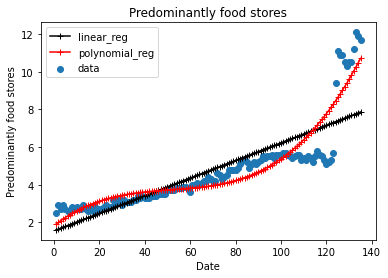

In [127]:
X_pre =  np.array(uk["Predominantly food stores"]).reshape(-1,1)
lin_reg_pre = LinearRegression()
lin_reg_pre.fit(ukdate,X_pre)
#Polynomial Regression Model Fitting
poly_reg_pre= PolynomialFeatures(degree=3)
X_poly_pre = poly_reg_pre.fit_transform(ukdate)
pol_reg_pre = LinearRegression()
pol_reg_pre.fit(X_poly_pre, X_pre)
linear_pred_pre= lin_reg_pre.predict(ukdate)
poly_pred_pre= pol_reg_pre.predict(poly_reg_pre.fit_transform(ukdate))

plt.scatter(ukdate, X_pre)
plt.plot(ukdate, linear_pred_pre, '+-', color='black')
plt.plot(ukdate, poly_pred_pre, '+-', color='red')
plt.title("Predominantly food stores")
plt.xlabel('Date')
plt.ylabel("Predominantly food stores")
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [130]:
print('Score:', mean_squared_error(X_pre, linear_pred_pre))
print('Score:', mean_squared_error(X_pre, poly_pred_pre))
print('Linear Model Fit Score:', lin_reg_pre.score(ukdate, X_pre))
print('Polynomial Model Fit Score:', pol_reg_pre.score(X_poly_pre, X_pre))

Score: 1.509900908432902
Score: 0.7362409923784508
Linear Model Fit Score: 0.6875135524302219
Polynomial Model Fit Score: 0.8476288536693639


In [131]:
print('Linear Regression Predominantly food stores Predictions')
print('20 Nov: ', lin_reg_pre.predict([[131]]))
print('20 Dec: ', lin_reg_pre.predict([[132]]))
print('21 Jan: ', lin_reg_pre.predict([[133]]))
print('21 Feb: ', lin_reg_pre.predict([[134]]))
print('21 Mar: ', lin_reg_pre.predict([[135]]))

Linear Regression Predominantly food stores Predictions
20 Nov:  [[7.67688486]]
20 Dec:  [[7.72365493]]
21 Jan:  [[7.770425]]
21 Feb:  [[7.81719507]]
21 Mar:  [[7.86396514]]


In [132]:
print('Polynomial Regression  Predominantly food stores Predictions')
print('20 Nov: ', pol_reg_pre.predict(poly_reg_pre.fit_transform([[131]])))
print('20 Dec: ', pol_reg_pre.predict(poly_reg_pre.fit_transform([[132]])))
print('21 Jan: ', pol_reg_pre.predict(poly_reg_pre.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_pre.predict(poly_reg_pre.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_pre.predict(poly_reg_pre.fit_transform([[135]])))

Polynomial Regression  Predominantly food stores Predictions
20 Nov:  [[9.81981464]]
20 Dec:  [[10.03498651]]
21 Jan:  [[10.25535531]]
21 Feb:   [[10.48098558]]
21 Mar:   [[10.71194187]]


### Real Results
20-Oct	10.5

20-Nov	10.5

20-Dec	11.2

21-Jan	12.1

21-Feb	11.9

21-Mar	11.7

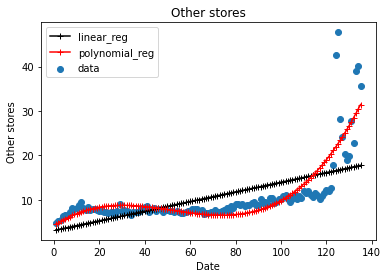

In [133]:
X_other =  np.array(uk["Other stores"]).reshape(-1,1)
lin_reg_other = LinearRegression()
lin_reg_other.fit(ukdate,X_other)
#Polynomial Regression Model Fitting
poly_reg_other = PolynomialFeatures(degree=3)
X_poly_other= poly_reg_other.fit_transform(ukdate)
pol_reg_other = LinearRegression()
pol_reg_other.fit(X_poly_other, X_other)
linear_pred_other = lin_reg_other.predict(ukdate)
poly_pred_other = pol_reg_other.predict(poly_reg_non.fit_transform(ukdate))

plt.scatter(ukdate, X_other)
plt.plot(ukdate, linear_pred_other, '+-', color='black')
plt.plot(ukdate, poly_pred_other, '+-', color='red')
plt.title("Other stores")
plt.xlabel('Date')
plt.ylabel("Other stores")
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [134]:
print('Score:', mean_squared_error(X_other, linear_pred_other))
print('Score:', mean_squared_error(X_other, poly_pred_other))
print('Linear Model Fit Score:', lin_reg_other.score(ukdate, X_other))
print('Polynomial Model Fit Score:', pol_reg_other.score(X_poly_other, X_other))

Score: 32.44801402187803
Score: 14.818962415744018
Linear Model Fit Score: 0.35473301886941644
Polynomial Model Fit Score: 0.7053074762896913


In [135]:
print('Linear RegressionOther stores Predictions')
print('20 Nov: ', lin_reg_other.predict([[131]]))
print('20 Dec: ', lin_reg_other.predict([[132]]))
print('21 Jan: ', lin_reg_other.predict([[133]]))
print('21 Feb: ', lin_reg_other.predict([[134]]))
print('21 Mar: ', lin_reg_other.predict([[135]]))

Linear RegressionOther stores Predictions
20 Nov:  [[17.36489481]]
20 Dec:  [[17.4732735]]
21 Jan:  [[17.5816522]]
21 Feb:  [[17.69003089]]
21 Mar:  [[17.79840959]]


In [136]:
print('Polynomial Regression Other stores Predictions')
print('20 Nov: ', pol_reg_other.predict(poly_reg_other.fit_transform([[131]])))
print('20 Dec: ', pol_reg_other.predict(poly_reg_other.fit_transform([[132]])))
print('21 Jan: ', pol_reg_other.predict(poly_reg_other.fit_transform([[133]])))
print('21 Feb:  ', pol_reg_other.predict(poly_reg_other.fit_transform([[134]])))
print('21 Mar:  ', pol_reg_other.predict(poly_reg_other.fit_transform([[135]])))

Polynomial Regression Other stores Predictions
20 Nov:  [[27.61892019]]
20 Dec:  [[28.53945327]]
21 Jan:  [[29.48523533]]
21 Feb:   [[30.45658242]]
21 Mar:   [[31.45381056]]


### Real Results

20-Oct	19.9

20-Nov	27.8

20-Dec	22.9

21-Jan	39.1

21-Feb	40.1

21-Mar	35.6



As a conclusion we can't reject H0. The rates went up in each category.